In [1]:
# imports
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np
import PIL 
import wordcloud 
import spacy, nltk, gensim, sklearn

from os import path
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from matplotlib.pyplot import figure

/Users/amaellebidet/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
year = 2020 # available: from 2015 to 2020
PATH_DATA = './data/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 5000
reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

In [7]:
i=0
for chunk in reader:
    if i: 
        df_0 = chunk
        break
    else: i=1

In [3]:
text = ""

for quote in df_0.quotation:
    text = text + ' ' + quote

In [4]:
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [5]:
# Casefolding
text = text.lower()

In [6]:
# Remove words shorter than 3 characters
new_text = ' '.join([w for w in text.split() if len(w)>3])

In [7]:
# Stopwords removal 
PATH = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra","wow", "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", "ready","tell", "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate","realize", "weekend", "song", "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news","local", "global", "case",  "means"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1180
1180


In [8]:
#Creating a spacy object
doc = nlp(new_text)

In [9]:
# Tokenization : strings are encoded to hashes
tokens = [token.text for token in doc]

In [10]:
# Tokenization : strings are encoded to hashes + Part of speech tagging
pos_tagged = [(token.text, token.tag_) for token in doc]

In [11]:
# Lemmatization
# removing stop words and lematize
words = []
words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']

In [19]:
print(words[:100])

['kind', 'supportive', 'learn', 'fun', 'comment', 'lecturer', 'irritable', 'tense', 'worry', 'lot', 'want', 'class', 'act', 'appointment', 'year', 'go', 'like', 'little', 'doll', 'woman', 'dominate', 'world', 'young', 'try', 'different', 'thing', 'love', 'play', 'gon', 'na', 'drink', 'Budweisers', 'tomorrow', 'listen', 'gon', 'na', 'day', 'mourn', 'sister', 'yeah', 'go', 'particular', 'hit', 'talk', 'million', 'dollar', 'shave', 'gross', 'product', 'Success', 'woman', 'change', 'feel', 'thing', 'feel', 'like', 'successful', 'woman', 'round', 'human', 'feed', 'work', 'broad', 'way', 'interesting', 'underscore', 'need', 'work', 'female', 'faculty', 'base', 'Democratic', 'Party', 'african', 'american', 'woman', 'consistent', 'voter', 'election', 'voter', 'swing', 'state', 'budget', 'Governor', 'Lamont', 'present', 'General', 'Assembly', 'Wednesday', 'fully', 'compliant', 'exist', 'cap', 'engage', 'game', 'playing', 'gimmickry', 'haunt', 'state', 'decade']


In [13]:
text_wordcloud = ""

for element in words:
    text_wordcloud = text_wordcloud + ' ' + element

In [14]:
print(text_wordcloud[:2000])

 open conversation guard open conversation minute father coach japanese star talk happy intentive witness kid worker skype son kobe cool retire october 2009 week wife issue complain body clean pass inspection share lipstick gloss duchess ambition constantly rise achieve seemingly impossible aude perfect ambassador brand specifically innovative rechargeable handstick work flexible workplace allow support wife occasion transition child bear ability change hour schedule integral smooth transition primary school age child flexible workplace allow wife share drop pick duty involve circular activate child tear mum deprive wife mom picture blowing candle post facebook page love mature lens difficult trace legacy minefield latent misogyny wannabe imitator sexual misconduct couple normal love rub brother sister brother footstep son proud keep stewart leigha harris player beach area change audience adult child material starting frozen movie child book snow queen hans christian andersen escape gr

(-0.5, 399.5, 199.5, -0.5)

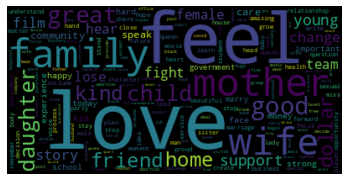

In [15]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text_wordcloud)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)

<Figure size 432x288 with 0 Axes>

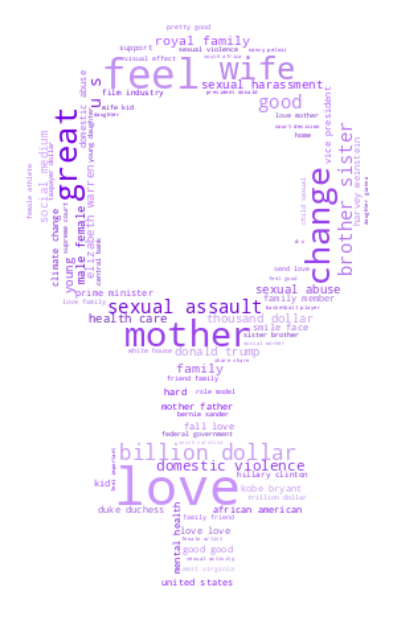

<Figure size 432x288 with 0 Axes>

In [16]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

figure(figsize=(12, 10), dpi=80)
d = PATH_DATA
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1, height=100,width=100,collocation_threshold=5).generate(text_wordcloud)

# store to file
wc.to_file(path.join(d, "women_symbol.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

## Running a wordcloud for multiple chunks

In [2]:
# Initilalize spacy analyzer in english
nlp = spacy.load('en')

In [22]:
year = 2018 # available: from 2015 to 2020
PATH_DATA = './data/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 250
reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

In [30]:
# Stopwords removal 
PATH = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH, header=None)
sw_list = list(sw.values.flatten())
sw_list =  sw_list[:-2] #remove 2 NaNs at the end of the list

# Wordcloud stopwords
stopwords =  list(STOPWORDS) + sw_list

# Additionnal handpicked stopwords
add_sw = ["people","women","girl","woman","time","thing","year","made","back","make","continue"
            "lot", "find", "day", "big", "know", "want", "start", "world","person","long","bring","country","run",
            "read","state","leave","live","happen","bit","million","cut","buy","put","set","end", "place","today"
            "story", "entire", "meet", "add", "call","game","high","continue","inside","door","email","watch","real",
            "week","fact","ask","spend","public","pull","turn","rest","fun","play","point","years","life","let","yeah",
            "open", "talk", "issue", "immediately","pass", "work","allow","hour","minute","importantly", "involve", "extra","wow",
            "tear", "clear", "pattern","making", "alive", "check", "lot", "reach", "night", "stage", "source", "beg", "ready","tell", 
            "left","right","room", "yeah", "see", "sort", "number", "show", "test","season", "demonstrate","realize", "weekend", "song", 
            "come", "theme", "view", "link", "early", "give","note", "explain", "choose","news","local", "global", "case",  "means"
            "united", "states","u.s","birthday","brother", "prime", "minister", "provide","hold","focus","hand","plan","loose","lose","saty"]
stopwords = stopwords + add_sw
# Loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords = stopwords + list(spacy_stopwords)
print(len(stopwords))
nlp.Defaults.stop_words = stopwords
print(len(nlp.Defaults.stop_words))

1186
1186


In [24]:
j = 0

words = []
for chunk in reader:

    # Convert into single string text
    text = ""
    text = ' '.join(quote for quote in chunk.quotation)
    # Casefolding
    text = text.lower()
    # Remove words shorter than 3 characters
    new_text = ' '.join([w for w in text.split() if len(w)>3])   
       
    # Creating a spacy object
    doc = nlp(new_text)
    # Tokenizer
    tokens = [token.text for token in doc]
    # Lemmatization
    # removing stop words and lematize
    words = words + [token.lemma_ for token in doc if (str(token) in stopwords) != True and token.is_punct != True 
                    and str(token) != '-PRON-' and str(token) != '`']
                    
    print(f'{j+1}/100')
    j = j+1
    if j == 100:
        break


1/100
2/100
3/100
4/100
5/100
6/100
7/100
8/100
9/100
10/100
11/100
12/100
13/100
14/100
15/100
16/100
17/100
18/100
19/100
20/100
21/100
22/100
23/100
24/100
25/100
26/100
27/100
28/100
29/100
30/100
31/100
32/100
33/100
34/100
35/100
36/100
37/100
38/100
39/100
40/100
41/100
42/100
43/100
44/100
45/100
46/100
47/100
48/100
49/100
50/100
51/100
52/100
53/100
54/100
55/100
56/100
57/100
58/100
59/100
60/100
61/100
62/100
63/100
64/100
65/100
66/100
67/100
68/100
69/100
70/100
71/100
72/100
73/100
74/100
75/100
76/100
77/100
78/100
79/100
80/100
81/100
82/100
83/100
84/100
85/100
86/100
87/100
88/100
89/100
90/100
91/100
92/100
93/100
94/100
95/100
96/100
97/100
98/100
99/100
100/100


In [25]:
text_wordcloud = ""

for element in words:
    text_wordcloud = text_wordcloud + ' ' + element

KeyboardInterrupt: 

In [27]:
text_wordcloud = ""

text_wordcloud = ' '.join(word for word in words)

<Figure size 432x288 with 0 Axes>

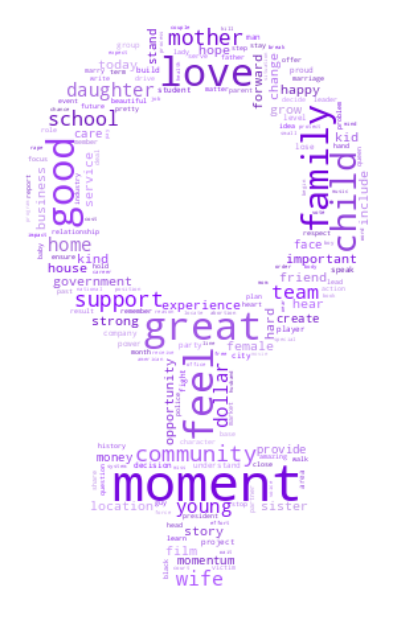

<Figure size 432x288 with 0 Axes>

In [32]:
# Function to change colour of word cloud
def violet_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return ("hsl(271, %d%%" % random.randint(60, 100)) + (", %d%%)" % random.randint(40, 80))

figure(figsize=(12, 10), dpi=80)
d = PATH_DATA
# Read the mask image
women_mask = np.array(Image.open(r"/Users/amaellebidet/Desktop/ADA/Projet/ada-2021-project-adacadabras/data/women_symbol_mask.png"))

# Generate Wordcloud
wc = WordCloud(color_func=violet_color_func, background_color="white", max_words=2000, mask=women_mask,
               stopwords=stopwords, max_font_size=40, random_state=1, height=100,width=100,collocation_threshold=50).generate(text_wordcloud)

# store to file
wc.to_file(path.join(d, "women_symbol.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()